# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import pandas as panditasbb
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = panditasbb.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
# Your code here:
fifa['ValueNumeric'] = fifa.Value.str.replace(r'\D+','').astype(int)
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,1105
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,1185
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# formula = 'S ~ C(E) + C(M) + X'
# lm = ols(formula, salary_table).fit()
# print(lm.summary())

In [6]:
# Your code here:
formula = 'ValueNumeric ~ C(Position) + C(fifa["Preferred Foot"])'
lm = ols(formula, fifa).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     3.492
Date:                Sat, 18 Jul 2020   Prob (F-statistic):           2.34e-09
Time:                        01:31:04   Log-Likelihood:            -1.2810e+05
No. Observations:               18147   AIC:                         2.563e+05
Df Residuals:                   18119   BIC:                         2.565e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [7]:
table = anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(Position),26.0,7.380220e+06,283854.620247,3.575897,1.963284e-09
"C(fifa[""Preferred Foot""])",1.0,1.037326e+05,103732.602586,1.306786,2.529926e-01
Residual,18119.0,1.438286e+09,79379.966240,NaN,NaN


What is your conclusion from this ANOVA?

In [8]:
# Your conclusions here:
# Position has a greater impact on player's value that preferred foot, and actually it has a significant weight on it
# On the other hand, preffered foot has no considerable impact on the value


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [9]:
# Your code here:
formula_nationality = 'ValueNumeric ~ C(Nationality)'
lm_nationality = ols(formula_nationality, fifa).fit()
table_nationality = anova_lm(lm_nationality)
table_nationality

,df,sum_sq,mean_sq,F,PR(>F)
C(Nationality),163.0,3.698983e+07,226931.451837,2.902609,2.051848e-31
Residual,18043.0,1.410636e+09,78181.885884,NaN,NaN


What is your conclusion from this ANOVA?

In [10]:
# Nacionality has an impact on the value, not as important as position, but still it is a parameter to describe player's value

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [11]:
# Your code here:
fifa.dropna(inplace=True)

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [12]:
# Your code here:
#X = sm.add_constant(ironhackersDF.altura)
#Y = ironhackersDF.calzado
#modelo = sm.OLS(Y, X).fit()

X = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])
Y = fifa.ValueNumeric
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.045
Date:                Sat, 18 Jul 2020   Prob (F-statistic):             0.0476
Time:                        01:31:06   Log-Likelihood:            -1.2653e+05
No. Observations:               17918   AIC:                         2.531e+05
Df Residuals:                   17915   BIC:                         2.531e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         264.6097     10.110     26.172      0.000     244.793     284.427
Stamina        -0.2204      0.169     -1.304      0.192      -0.552       0.111
SprintSpeed     0.4492      0.183      2.453      0.014       0.090       0.808
==============================================================================
Omnibus:                     2004.473   Durbin-Watson:                   1.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2285.176
Skew:                           0.834   Prob(JB):                         0.00
Kurtosis:                       2.470   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [13]:
# Your conclusions here:
# The F-test, when used for regression analysis, lets you compare two competing regression models in their ability to “explain” the variance in the dependent variable.(TDS)
# In linear regression, the F-test can be used to answer the following questions:
    # Will you be able to improve your linear regression model by making it more complex i.e. by adding more linear regression variables to it?  --> Restricted Model
    # If you already have a complex regression model, would you be better off trading your complex model with the intercept-only model (which is the simplest linear regression model you can build)? --> Unrestricted Model

# The pvalue = 0.0476, which is slightly smaller than 0.05, if we consider this alpha a valid, we can say that we reject H_0 and do not reject H_1, this means that this model is able to explain 
# the variance in ValueNumeric. But, beware, because apparently this only applies for SprintSpeed, since pvalue for Stamina is >> alpha. Therefore, it could indicates that this model actually
# does not fit and we can't trust in it.


# R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.
# R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. (statisticsbyjim.com)
# R-squared is always between 0 and 100%:
    # 0% represents a model that does not explain any of the variation in the response variable around its mean. The mean of the dependent variable predicts the dependent variable as well as the regression model.
    # 100% represents a model that explains all of the variation in the response variable around its mean.
# Usually, the larger the R2, the better the regression model fits your observations.

# Considering that R-squarred = 0, we can say that the model with our independent variables (Stamina and SprintSpeed) do not explain the variance in ValueNumeric

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [14]:
# Your code here:
X = sm.add_constant(fifa.Potential)
Y = fifa.ValueNumeric
model_potential = sm.OLS(Y, X).fit()
model_potential.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     659.1
Date:                Sat, 18 Jul 2020   Prob (F-statistic):          8.77e-143
Time:                        01:31:06   Log-Likelihood:            -1.2621e+05
No. Observations:               17918   AIC:                         2.524e+05
Df Residuals:                   17916   BIC:                         2.524e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        897.1573     24.137     37.169      0.000     849.845     944.469
Potential     -8.6557      0.337    -25.673      0.000      -9.317      -7.995
==============================================================================
Omnibus:                     1987.498   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2670.352
Skew:                           0.937   Prob(JB):                         0.00
Kurtosis:                       2.740   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [15]:
# Your conclusions here:
# Altough we have a really small F-pvalue, R-squared is also too small, so we can say that this model can't predict ValueNumeric considering Potential


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

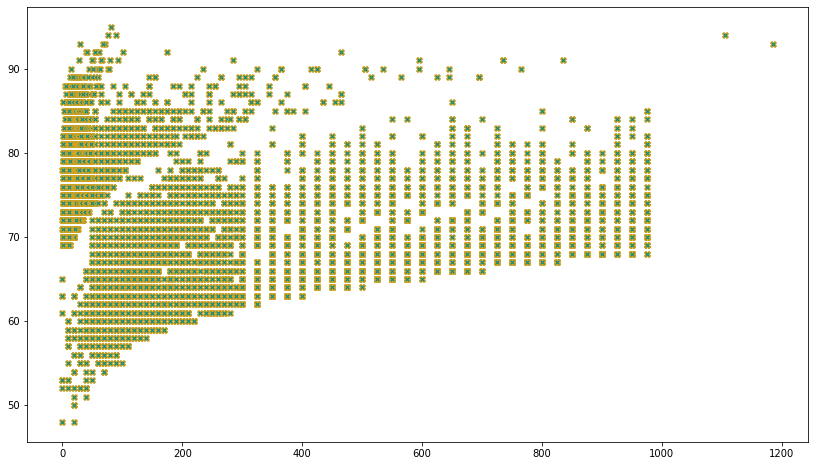

In [16]:
# Your code here:
plt.figure(figsize=(14,8))
plt.scatter(fifa.ValueNumeric, fifa.Potential, c='darkcyan', marker='X', edgecolors='goldenrod');

In [17]:
# No, it is not a linear relationship, but an exponential one